In [165]:
from api import FPL_API
from player import Player
from manager import Manager
from league import League

import plotly.graph_objects as go
import plotly.express as px

api = FPL_API(offline=True)
toilet = League(121011,api)
toilet_starting = toilet.get_starting_players()

>>> FPL_API.__init__(quick=True)
Current: GW1
Wiki: GW1
Live: False
>>> League(Tesco Bean Value Toilet League)::get_stats()::ManagerInits
[##################################################] 100.00%


In [115]:
#help(Manager)
#help(Player)
#help(League)

In [29]:
m_max = Manager("Max Winokan", 264578, api)

m_max.squad.players

>>> Manager.__init__(Max Winokan,264578)
>>> get_team_shirt(Max Winokan)


[Ederson M.,
 Gabriel,
 Estupiñan,
 Shaw,
 Martinelli,
 Rashford,
 Saka,
 Mitoma,
 Foden,
 Watkins,
 Haaland,
 Turner,
 Baldock,
 Colwill,
 Mubama]

In [159]:
def toilet_num(query):
    return len([p for p in toilet_starting if p.id == query.id])/len(toilet.managers)

def stat_line(p):
    print(f'{p.name:<15} {p.expected_points(use_official=True):4.1f} {p.next5_expected:5.1f} {p.selected_by:>6.1f}% {toilet_num(p):>6.1%} {p.transfer_percent:>+8.1%}')

def separator():
    print('-'*50)

def header():
    print(f'{"Name":<15} GW{api.current_gw+1:<2} Next5  Global Toilet Trans.')

In [168]:
compare_out = ['Martinelli','Rashford','Foden']
compare_in = ['Luis','Chilwell']

players_out = [[p for p in m_max.squad.players if p.name == name][0] for name in compare_out]
players_in = [Player(name,api) for name in compare_in]

In [169]:
header()

separator()

for p in players_out:
    stat_line(p)

separator()

for p in players_in:
    stat_line(p)

Name            GW2  Next5  Global Toilet Trans.
--------------------------------------------------
Martinelli       3.3  22.4   15.4%  19.6%  +364.4%
Rashford         3.5  30.4   49.4%  57.1%   +52.5%
Foden            4.1  37.2    8.7%  15.2%    +9.4%
--------------------------------------------------
Luis Díaz        3.1  49.0    8.0%   5.4% +2796.5%
Chilwell         2.1  35.4   18.2%  17.9% +2976.8%


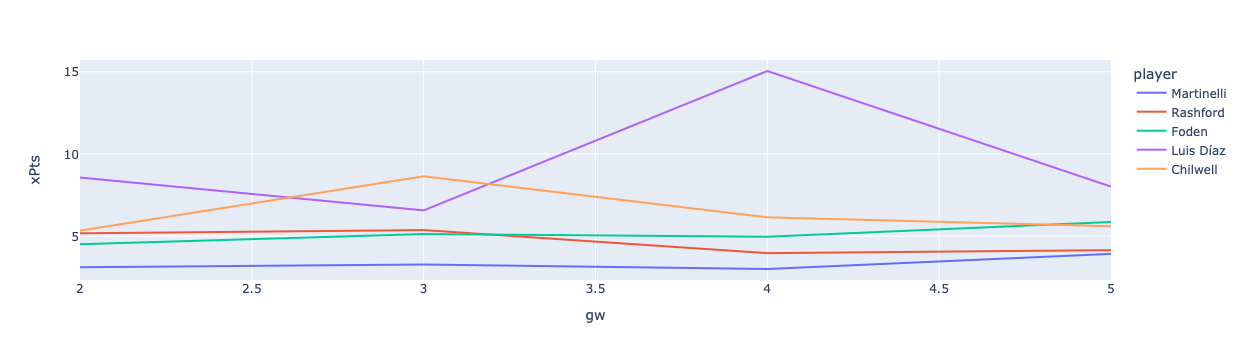

In [182]:
data = []

for p in players_out + players_in:
    for gw in range(api.current_gw+1,api.current_gw+5):
        opponent = p.team_obj.get_opponent(gw)
        data.append(dict(
            player=p.name,
            xPts=p.expected_points(gw=gw),
            gw=gw,
            opponent=opponent.shortname,
        ))

fig = px.line(data,x='gw',y='xPts',color='player',)
        
fig.show()